# building cnn- convolutional neural network

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#	Sneaker
#8	Bag
#9	Ankle boot

In [ ]:
class_labels =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

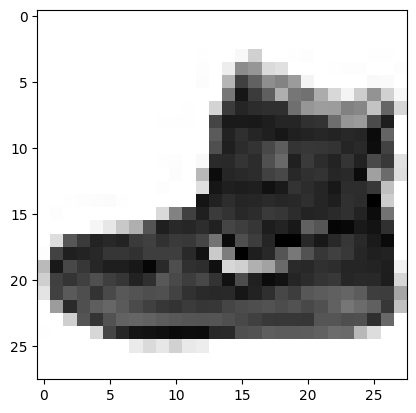

In [ ]:
plt.imshow(x_train[0],cmap="Greys")

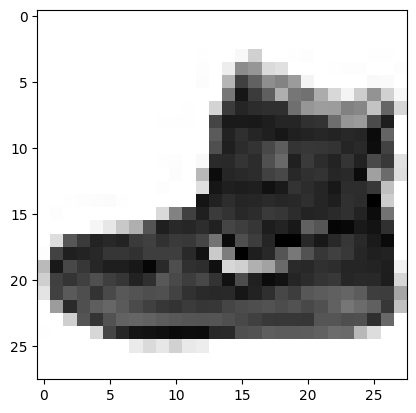

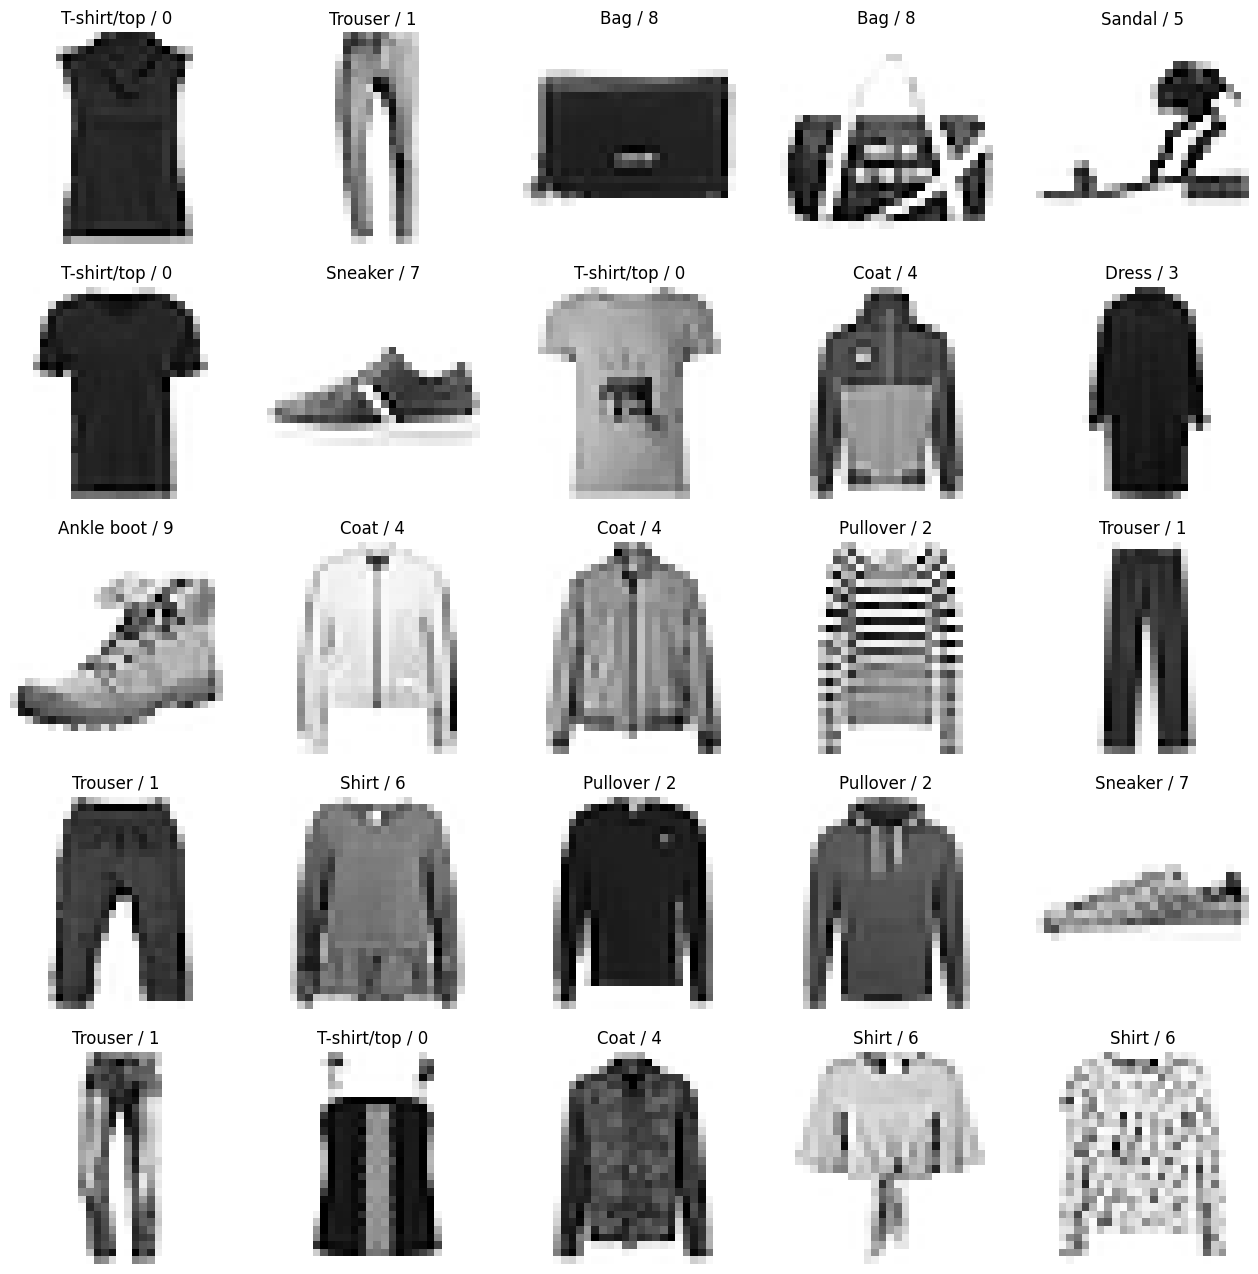

In [ ]:
plt.imshow(x_train[0], cmap='Greys')

plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

#change dimention

In [ ]:
x_train.ndim

3

In [ ]:
x_train.shape#niche apel value joi ne lage k e 3 dimentional che

(60000, 28, 28)

In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_train,-1)   #3 dimention ma che tene 4 ma convert krva mate

In [ ]:
x_train.shape
#x_train.ndim

(60000, 28, 28, 1)

#feature scalling

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078431],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.18823529],
        [0.16862745],
        [0.34117647],
        [0.65882353],
        [0.52156863],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215686],
        [0.53333333],
        [0.85882353],
        [0.84705882],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

#validation data set(split data set from train data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_val.shape

(12000, 28, 28, 1)

In [ ]:
y_val.shape

(12000,)

In [ ]:
x_train.shape

(48000, 28, 28, 1)

#convolutional neural network

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),#kernal size means ketlu matrix apvu che te,strides= staring ma ketli column reva devi te,padding =pachal ketli 00 valu column add krvi te [28,28 te shape che image no and pachl 1 che eno meanig evo k greys image che jo color vali image hoi to biji kaik value avse]
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary